# **PCA Analyse**


## **Bibliotheken Importieren und Verbindungen herstellen**


In [1]:
# Notebook: notebooks/load_dat.ipynb

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder #-- IGNORE -- 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA # -- IGNORE --
from typing import Tuple, List, Dict, Union, Any # -- IGNORE --

# ============================================================
# ✅ Add the project root to sys.path (not /core)
# ============================================================
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added to sys.path:", project_root)

Project root added to sys.path: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide


In [2]:
# Verify that core is importable
try:
    import core

    print("✅ core module found at:", core.__file__)
except ModuleNotFoundError:
    print("❌ core module not found. Check your sys.path!")

:weißes_häkchen: Connected to PostgreSQL database.
✅ core module found at: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core/__init__.py


In [3]:
# Pfad für Feature-Metriken
pca_data_path = os.path.join(project_root, 'data', 'processed', 'pca')
pca_fig_path = os.path.join(project_root, 'reports', 'viz', 'pca')
# eda_data_path = os.path.join(project_root, 'reports', 'eda', 'results')
os.makedirs(pca_data_path, exist_ok=True)
os.makedirs(pca_fig_path, exist_ok=True)
# os.makedirs(eda_data_path, exist_ok=True)

In [4]:
from core.load_data import load_table # type: ignore

In [5]:
df_users = load_table(data_type="feature", table_name="user_base")

:aktenordner: Lade Tabelle 'user_base' aus CSV: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/core/../data/processed/feature_metrics/user_base.csv
:weißes_häkchen: CSV geladen. Zeilen: 5998


In [6]:
# Zeigen alles spalten im DataFrame an
df_users.columns

Index(['user_id', 'num_clicks', 'avg_session_clicks', 'num_empty_sessions',
       'num_sessions', 'num_canceled_trips', 'avg_session_duration',
       'num_trips', 'num_destinations', 'num_flights', 'num_hotels',
       'num_discount_trips', 'avg_money_spent_flight',
       'avg_time_after_booking', 'avg_money_spent_per_seat',
       'avg_money_spent_hotel', 'avg_km_flown', 'avg_bags', 'gender',
       'married', 'has_children', 'home_country', 'home_city', 'age'],
      dtype='object')

In [7]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   5998 non-null   int64  
 1   num_clicks                5998 non-null   int64  
 2   avg_session_clicks        5998 non-null   float64
 3   num_empty_sessions        5998 non-null   int64  
 4   num_sessions              5998 non-null   int64  
 5   num_canceled_trips        5998 non-null   int64  
 6   avg_session_duration      5998 non-null   float64
 7   num_trips                 5542 non-null   float64
 8   num_destinations          5542 non-null   float64
 9   num_flights               5542 non-null   float64
 10  num_hotels                5542 non-null   float64
 11  num_discount_trips        5542 non-null   float64
 12  avg_money_spent_flight    5175 non-null   float64
 13  avg_time_after_booking    5180 non-null   float64
 14  avg_mone

In [8]:
# Identifizieren der kategorischen Spalten
catagorical_cols = df_users.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Kategorische Spalten:", catagorical_cols)

Kategorische Spalten: ['gender', 'married', 'has_children', 'home_country', 'home_city']


In [9]:
print(df_users.home_country.unique())

['usa' 'canada']


In [10]:
print(df_users.home_city.unique())

['new york' 'kansas city' 'tacoma' 'boston' 'miami' 'los angeles'
 'santa ana' 'el paso' 'austin' 'birmingham' 'colorado springs' 'toronto'
 'tampa' 'atlanta' 'grand rapids' 'houston' 'phoenix' 'fort worth'
 'tallahassee' 'chicago' 'ottawa' 'cincinnati' 'long beach' 'little rock'
 'stockton' 'halifax' 'washington' 'san antonio' 'burlington'
 'bakersfield' 'louisville' 'dallas' 'cleveland' 'tulsa' 'winnipeg'
 'indianapolis' 'mobile' 'san diego' 'detroit' 'oklahoma city' 'london'
 'minneapolis' 'san francisco' 'las vegas' 'calgary' 'lincoln' 'milwaukee'
 'providence' 'tucson' 'amarillo' 'montreal' 'victoria' 'charlotte'
 'wichita' 'nashville' 'san jose' 'st. petersburg' 'hamilton' 'oakland'
 'fresno' 'anchorage' 'vancouver' 'quebec' 'omaha' 'sacramento' 'newark'
 'laredo' 'philadelphia' 'knoxville' 'seattle' 'portland' 'memphis'
 'richmond' 'norfolk' 'des moines' 'new orleans' 'madison' 'winston-salem'
 'honolulu' 'riverside' 'columbus' 'lubbock' 'fayetteville' 'st. louis'
 'rochester' '

In [11]:
print(df_users.married.unique())

[ True False]


In [12]:
print(df_users.gender.unique())

['F' 'M' 'O']


In [13]:
df_users.gender.unique()

array(['F', 'M', 'O'], dtype=object)

In [14]:
# Anzeige der NaN-Werte in df_users
def display_nan_table(df: pd.DataFrame):
    """
    Displays a table with:
    - column_name
    - nan_count
    - nan_percent
    Only columns with NaN values are included.
    """

    total_rows = len(df)

    nan_count = df.isna().sum()
    nan_count = nan_count[nan_count > 0]   # keep only columns where NaN exists

    if nan_count.empty:
        print("✅ No NaN values in the DataFrame.")
        return

    nan_table = pd.DataFrame({
        "column_name": nan_count.index,
        "nan_count": nan_count.values,
        "nan_percent": (nan_count.values / total_rows * 100).round(2)
    })

    # Reset index for clean display
    nan_table = nan_table.reset_index(drop=True)

    display(nan_table)

In [15]:
# Display NaN table for df_users prozentuel
display_nan_table(df=df_users)

,column_name,nan_count,nan_percent
0,num_trips,456,7.60
1,num_destinations,456,7.60
2,num_flights,456,7.60
3,num_hotels,456,7.60
4,num_discount_trips,456,7.60
5,avg_money_spent_flight,823,13.72
6,avg_time_after_booking,818,13.64
7,avg_money_spent_per_seat,823,13.72
8,avg_money_spent_hotel,602,10.04
9,avg_km_flown,818,13.64


In [16]:
def preprocess_and_scale_data(
    df: pd.DataFrame,
    method: str = 'standard'
) -> Tuple[pd.DataFrame, Union[StandardScaler, MinMaxScaler, RobustScaler]]:
    """
    Bereinigt, verarbeitet vor und skaliert einen Benutzer-Datensatz.
    
    Schritte:
    - Entfernt unerwünschte Spalten (z.B. 'home_city')
    - Wendet Geschlechter-Mapping an (F=0, M=1, O=2)
    - Konvertiert binäre Spalten zu Integer-Werten
    - Füllt verbleibende NaN-Werte mit 0
    - Skaliert den Dataframe mit einer gewählten Methode:
        * 'standard'  -> StandardScaler (Normalverteilung)
        * 'minmax'    -> MinMaxScaler (0-1 Bereich)
        * 'robust'    -> RobustScaler (robust gegen Ausreißer)
    
    Args:
        df (pd.DataFrame): Eingabe-Datensatz
        method (str): Skalierungsmethode. Standard = 'standard'
        
    Returns:
        Tuple[pd.DataFrame, Scaler]:
            - Skalierter Dataframe
            - Angelernte Scaler-Instanz für spätere Verwendung
    """
    
    # =========================================================================
    # 1. DATENVORBEREITUNG UND BEREINIGUNG
    # =========================================================================
    
    # Arbeitskopie des Dataframes erstellen, um Originaldaten nicht zu verändern
    working_df = df.copy()
    
    
    # Preserve user_id separately
    # ---------------------------
    user_ids = working_df["user_id"] if "user_id" in working_df.columns else None
    if user_ids is not None:
        working_df = working_df.drop(columns=["user_id"])
    
    # -------------------------------------------------------------------------
    # Entferne 'home_city' Spalte, wir löschen es da es zu viele eindeutige Werte hat
    # zum beislpiel 105 verschiedene Städte
    # -------------------------------------------------------------------------
    if "home_city" in working_df.columns:
        print("🗑️ Dropping 'home_city' column.")
        working_df.drop(columns=["home_city"], inplace=True)
    
    # -------------------------------------------------------------------------
    # Geschlechter-Mapping anwenden
    # -------------------------------------------------------------------------
    if "gender" in working_df.columns:
        print("🔄 Mapping 'gender' (F=0, M=1, O=2) and dropping gender NaNs.")
        # Zuerst NaN-Werte in der Geschlechter-Spalte entfernen
        working_df = working_df.dropna(subset=["gender"])
        # Mapping-Definition: Weiblich=0, Männlich=1, Andere=2
        gender_map = {"F": 0, "M": 1, "O": 2}
        working_df["gender"] = working_df["gender"].map(gender_map)
    
    # -------------------------------------------------------------------------
    # Binäre Spalten in Integer konvertieren
    # -------------------------------------------------------------------------
    for col in ["married", "has_children"]:
        if col in working_df.columns:
            print(f"🔄 Converting '{col}' to integer (0/1).")
            # Sicherstellen, dass fehlende Werte erst ersetzt werden, dann in int konvertiert wird
            working_df[col] = working_df[col].fillna(0).astype(int)

    working_df["home_country"] = (working_df["home_country"] == "usa").astype(int)
    
    # -------------------------------------------------------------------------
    # Verbleibende NaN-Werte behandeln
    # -------------------------------------------------------------------------
    print("🩹 Filling remaining NaNs with 0.")
    # Füllt alle verbleibenden fehlenden Werte mit 0
    working_df.fillna(0, inplace=True)
    
    # =========================================================================
    # 2. DATEN-SKALIERUNG
    # =========================================================================
    
    print(f"📈 Scaling data using {method} scaler...")
    
    # Scaler basierend auf gewählter Methode auswählen
    if method == 'standard':
        # StandardScaler: Zentriert Daten auf Mittelwert=0, Standardabweichung=1
        # Gut für normalverteilte Daten
        scaler = StandardScaler()
    elif method == 'minmax':
        # MinMaxScaler: Skaliert Daten auf Bereich [0, 1]
        # Gut wenn bestimmte Wertebereiche benötigt werden
        scaler = MinMaxScaler()
    elif method == 'robust':
        # RobustScaler: Verwendet Median und Quantile, robust gegen Ausreißer
        # Gut für Daten mit vielen Ausreißern
        scaler = RobustScaler()
    else:
        raise ValueError("method must be one of: 'standard', 'minmax', 'robust'")
    
    # -------------------------------------------------------------------------
    # Scaler anlernen und Transformation durchführen
    # -------------------------------------------------------------------------
    
    # Scaler auf Daten anlernen und gleichzeitig transformieren
    X_scaled = scaler.fit_transform(working_df)
    
    # Zurück in DataFrame konvertieren mit ursprünglichen Index und Spaltennamen
    df_scaled = pd.DataFrame(
        X_scaled,
        index=user_ids,     # Behalte ursprünglichen Index
        columns=working_df.columns   # Behalte ursprüngliche Spaltennamen
    )
    
    print("✅ Preprocessing and scaling complete.")
    
    # Rückgabe: Skalierter Dataframe und Scaler-Objekt für spätere Verwendung
    # (z.B. zum Transformieren neuer Daten)
    return df_scaled, scaler

# =============================================================================
# VERWENDUNGSBEISPIEL:
# =============================================================================
# 
# # Daten laden
# user_data = pd.read_csv("user_data.csv")
# 
# # Vorverarbeitung und Skalierung durchführen
# scaled_data, scaler_object = preprocess_and_scale_data(
#     df=user_data, 
#     method='standard'
# )
# 
# # Scaler-Objekt kann später für neue Daten verwendet werden:
# # new_data_scaled = scaler_object.transform(new_data)
# 
# =============================================================================

In [17]:
df_scaled, scaler = preprocess_and_scale_data(df=df_users)

🗑️ Dropping 'home_city' column.
🔄 Mapping 'gender' (F=0, M=1, O=2) and dropping gender NaNs.
🔄 Converting 'married' to integer (0/1).
🔄 Converting 'has_children' to integer (0/1).
🩹 Filling remaining NaNs with 0.
📈 Scaling data using standard scaler...
✅ Preprocessing and scaling complete.


In [18]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5998 entries, 23557 to 844489
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_clicks                5998 non-null   float64
 1   avg_session_clicks        5998 non-null   float64
 2   num_empty_sessions        5998 non-null   float64
 3   num_sessions              5998 non-null   float64
 4   num_canceled_trips        5998 non-null   float64
 5   avg_session_duration      5998 non-null   float64
 6   num_trips                 5998 non-null   float64
 7   num_destinations          5998 non-null   float64
 8   num_flights               5998 non-null   float64
 9   num_hotels                5998 non-null   float64
 10  num_discount_trips        5998 non-null   float64
 11  avg_money_spent_flight    5998 non-null   float64
 12  avg_time_after_booking    5998 non-null   float64
 13  avg_money_spent_per_seat  5998 non-null   float64
 14  avg_mon

In [19]:
df_scaled.sample(15)

,num_clicks,avg_session_clicks,num_empty_sessions,num_sessions,num_canceled_trips,avg_session_duration,num_trips,num_destinations,num_flights,num_hotels,...,avg_time_after_booking,avg_money_spent_per_seat,avg_money_spent_hotel,avg_km_flown,avg_bags,gender,married,has_children,home_country,age
user_id,,,,,,,,,,,,,,,,,,,,,
516053,0.106349,-0.079857,-0.881470,1.725927,0.0,-0.249634,1.522737,1.294129,1.855368,0.419366,...,-0.211253,0.854434,-0.617242,0.690792,-0.226776,-0.362212,-0.887269,1.436430,0.449181,0.040712
590558,-0.142531,-0.308835,0.360060,1.725927,0.0,-0.314170,0.207731,-0.823023,-0.831782,0.419366,...,-0.252668,-0.724868,1.086950,-0.769622,0.953875,-0.362212,1.127054,-0.696171,0.449181,-1.231747
524172,-0.322277,-0.474209,2.222356,1.725927,0.0,-0.362571,-1.764778,-1.528741,-1.503570,-1.633986,...,-0.390719,-1.168623,-0.811867,-1.177063,-1.013877,-0.362212,-0.887269,-0.696171,0.449181,-1.755781
518324,1.018907,1.106380,-1.502236,-0.443872,0.0,0.060425,1.522737,1.294129,1.519474,1.788267,...,-0.243465,-0.606774,-0.473219,-0.557155,-0.226776,-0.362212,-0.887269,-0.696171,0.449181,-0.152306
521286,-0.709423,-0.682516,0.980826,-0.443872,0.0,-0.414084,-1.107275,-0.823023,-0.831782,-0.949535,...,-0.229660,0.971714,-0.690767,0.920429,0.953875,-0.362212,-0.887269,-0.696171,-2.226276,-0.680659
530775,-0.972130,-0.954428,-0.260705,-0.443872,0.0,-0.489280,0.207731,0.588412,0.511793,-0.265085,...,-0.229660,0.812930,-0.416562,0.672343,0.953875,-0.362212,1.127054,-0.696171,0.449181,0.707974
528421,-0.101051,-0.052825,-2.743766,-0.443872,0.0,-0.243987,2.837743,1.999847,2.527156,1.788267,...,-0.241164,-0.198336,0.667065,-0.155592,-0.030001,-0.362212,-0.887269,-0.696171,-2.226276,-0.459905
532568,0.534974,0.605489,-0.260705,-0.443872,0.0,-0.071297,0.207731,-0.823023,-0.831782,0.419366,...,-0.068601,0.131273,-0.336550,-0.040025,-1.013877,-0.362212,-0.887269,-0.696171,-2.226276,0.871663
489802,-1.027436,-1.011673,0.980826,-0.443872,0.0,-0.505875,-1.107275,-0.823023,-0.831782,-0.949535,...,-0.183643,0.006622,-0.163117,-0.044731,-1.013877,-0.362212,1.127054,-0.696171,0.449181,-0.207778


In [20]:
def apply_pca(
    df_scaled: pd.DataFrame,
    variance_threshold: float = 0.95
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Applies PCA on a scaled DataFrame and returns the PCA-transformed data
    and the component matrix (eigenvectors / coefficients for each principal component).
    Args:
        df_scaled (pd.DataFrame): Preprocessed & scaled DataFrame.
        variance_threshold (float): Fraction of variance to keep (default=0.95).
    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]:
            - PCA-transformed DataFrame
            - Component matrix with features as index and PCs as columns
    """
    # Initialize PCA with the desired variance threshold
    pca = PCA(n_components=variance_threshold, random_state=42)
    # Fit PCA and transform data
    df_pca = pca.fit_transform(df_scaled)
    # Convert transformed data to DataFrame
    df_pca = pd.DataFrame(df_pca, index=df_scaled.index,
                          columns=[f"pca_{i}" for i in range(df_pca.shape[1])])
    # Component matrix (coefficients for each PC)
    component_matrix = pd.DataFrame(pca.components_.T, index=df_scaled.columns,
                                    columns=[f"pca_{i}" for i in range(pca.n_components_)])
    return df_pca, component_matrix

In [21]:
# Anwendung der PCA
df_pca, component_matrix= apply_pca(df_scaled=df_scaled)

In [22]:
# Anzeigen einer Stichprobe der Komponentenmatrix
component_matrix.sample(5).T

,avg_time_after_booking,avg_money_spent_per_seat,num_empty_sessions,num_flights,married
pca_0,-0.078839,-0.188930,0.377994,-0.361389,-0.003823
pca_1,0.396343,0.401743,0.156590,-0.199576,0.008822
pca_2,-0.045587,-0.264968,0.037737,-0.119478,-0.122525
pca_3,-0.070516,-0.058033,0.078482,-0.032307,0.672206
pca_4,-0.011305,0.080607,0.187669,0.075171,-0.121679
pca_5,0.073869,-0.107515,-0.011739,-0.099033,-0.022074
pca_6,-0.032186,-0.031899,0.054582,0.016855,-0.117626
pca_7,-0.029944,-0.053251,0.050710,0.038509,-0.052725
pca_8,-0.014605,0.025185,0.117894,-0.004064,-0.019692
pca_9,-0.043296,-0.187651,0.043414,0.024703,-0.069240


In [23]:
def plot_cumulative_pca_variance(
    df_scaled: pd.DataFrame,
    variance_threshold: float = 0.95,
    figsize: Tuple[int, int] = (10, 6),
) -> int:
    """
    Führt PCA auf skalierten Daten durch, plottet die kumulative erklärte Varianz,
    speichert den Plot und gibt die Anzahl der benötigten Komponenten zurück,
    die einen bestimmten Varianz-Schwellenwert erreichen.

    Args:
        df_scaled (pd.DataFrame): Skalierte Eingabedaten (nur Features, keine IDs).
        variance_threshold (float): Anteil der beizubehaltenden Varianz (Standard=0.95).
        figsize (tuple): Größe der matplotlib Figure (Standard=(10,6)).

    Returns:
        int: Anzahl der Hauptkomponenten, die benötigt werden um den Varianz-Schwellenwert zu erreichen.
    """
    
    # =========================================================================
    # 1. PCA-DURCHFÜHRUNG
    # =========================================================================
    
    # PCA mit allen Komponenten initialisieren und anlernen
    # n_components=None bedeutet, dass alle Komponenten berechnet werden
    pca = PCA(n_components=None, random_state=42)
    pca.fit(df_scaled)
    
    # =========================================================================
    # 2. VARIANZ-BERECHNUNG
    # =========================================================================
    
    # Erklärte Varianz jeder Hauptkomponente extrahieren
    # Zeigt wie viel Information jede Komponente enthält
    explained_variance_ratio = pca.explained_variance_ratio_
    
    # Kumulative Varianz berechnen
    # Kumuliert die Varianzanteile der Komponenten aufsteigend
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    # =========================================================================
    # 3. BESTIMMUNG DER OPTIMALEN KOMPONENTEN-ANZAHL
    # =========================================================================
    
    # Finde die erste Komponente, die den Varianz-Schwellenwert erreicht oder überschreitet
    # np.where gibt Indizes zurück, [0][0] nimmt den ersten Index, +1 für 1-basierte Zählung
    n_components_needed = np.where(cumulative_variance >= variance_threshold)[0][0] + 1
    
    # =========================================================================
    # 4. PLOT-ERSTELLUNG
    # =========================================================================
    
    # Figure initialisieren
    plt.figure(figsize=figsize)
    
    # Hauptplot: Kumulative Varianz vs. Anzahl der Komponenten
    plt.plot(
        range(1, len(cumulative_variance) + 1),  # X-Achse: 1, 2, 3, ... Anzahl Komponenten
        cumulative_variance,                     # Y-Achse: Kumulative erklärte Varianz
        marker='o',                              # Punkte als Kreise markieren
        linestyle='-',                           # Durchgezogene Linie
        color='b',                               # Blaue Farbe
        label='Kumulative Varianz'               # Legenden-Eintrag
    )
    
    # Plot-Titel und Achsenbeschriftungen
    plt.title('Kumulative Erklärte Varianz durch Hauptkomponenten')
    plt.xlabel('Anzahl der Hauptkomponenten')
    plt.ylabel('Kumulative Erklärte Varianz')
    plt.grid(True)  # Raster hinzufügen für bessere Lesbarkeit
    
    # =========================================================================
    # 5. SCHWELLENWERT-LINIEN UND MARKIERUNGEN
    # =========================================================================
    
    # Horizontale Linie für Varianz-Schwellenwert (z.B. 95%)
    plt.axhline(
        y=variance_threshold, 
        color='r',                               # Rote Farbe
        linestyle='--',                          # Gestrichelte Linie
        label=f'{int(variance_threshold*100)}% Varianz Schwellenwert'  # Legende
    )
    
    # Vertikale Linie für benötigte Komponenten-Anzahl
    plt.axvline(
        x=n_components_needed, 
        color='g',                               # Grüne Farbe
        linestyle='--',                          # Gestrichelte Linie
        label=f'{n_components_needed} Komponenten'  # Legende
    )
    
    # Text-Annotation an der vertikalen Linie
    plt.text(
        n_components_needed,     # X-Position
        0.5,                     # Y-Position (mittig im Plot)
        f'{n_components_needed} Komponenten',  # Text
        color='g',               # Grüne Farbe
        ha='right',              # Text rechts von der Linie ausrichten
        va='center'              # Vertikal zentrieren
    )
    
    # =========================================================================
    # 6. PLOT-FINALISIERUNG
    # =========================================================================
    
    plt.legend(loc='lower right')  # Legende in unterer rechter Ecke
    plt.tight_layout()             # Layout optimieren
    
    # =========================================================================
    # 7. PLOT SPEICHERN
    # =========================================================================
    
    # Pfad für das Speichern des Plots erstellen
    save_path = os.path.join(pca_fig_path, "variance_vs_principal_component_pca.png")
    plt.savefig(save_path, dpi=300)  # Hochauflösend speichern (300 DPI)
    print(f"✅ Plot saved to: {save_path}")
    
    # Plot anzeigen
    plt.show()
    
    # =========================================================================
    # 8. RÜCKGABE DER ERGEBNISSE
    # =========================================================================
    
    return n_components_needed

# =============================================================================
# VERWENDUNGSBEISPIEL:
# =============================================================================
#
# # PCA-Varianzanalyse durchführen
# n_components = plot_cumulative_pca_variance(
#     df_scaled=scaled_data,          # Vorverarbeitete und skalierte Daten
#     variance_threshold=0.95,        # 95% der Varianz erklären
#     figsize=(12, 7)                 # Custom Figure-Größe
# )
#
# print(f"Empfohlene Anzahl an PCA-Komponenten: {n_components}")
#
# # Diese Anzahl kann dann für die eigentliche PCA-Dimensionalitätsreduktion verwendet werden:
# # pca_final = PCA(n_components=n_components)
# # df_pca = pca_final.fit_transform(scaled_data)
#
# =============================================================================

✅ Plot saved to: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/viz/pca/variance_vs_principal_component_pca.png


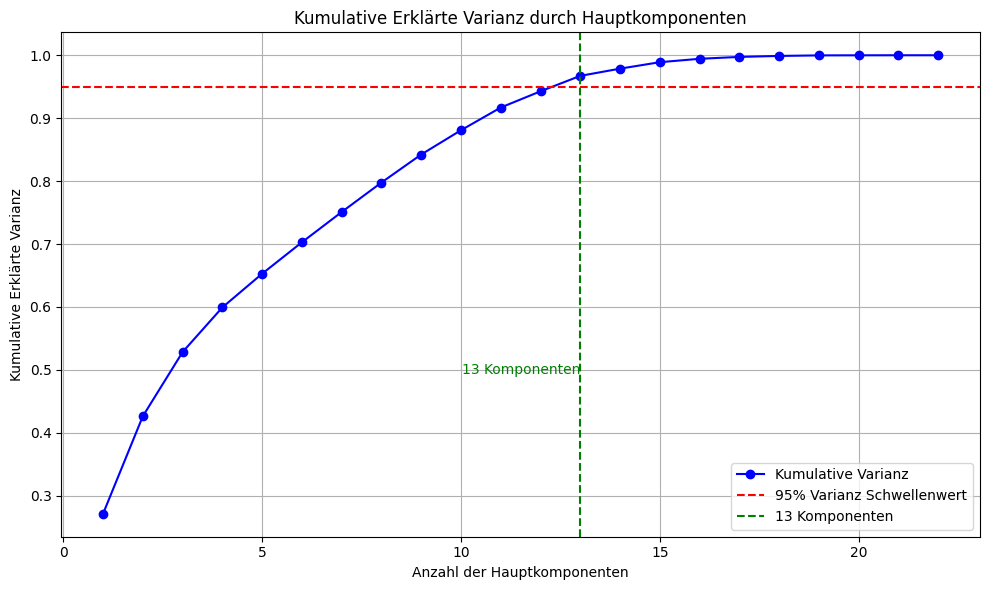

np.int64(13)

In [24]:
plot_cumulative_pca_variance(df_scaled=df_scaled)

# 📈 PCA Varianzanalyse

**Die ersten 19 Hauptkomponenten erklären über 95% der Gesamtvarianz im Datensatz, was eine exzellente Datenreduktion ermöglicht.**  
**Der steile Anstieg der Kurve zeigt, dass bereits die ersten 5-10 Komponenten den Großteil der Information enthalten.**  
**Für das Clustering können die Dimensionen somit von über 30 auf 19 Features reduziert werden, ohne wesentliche Informationsverluste.**


In [25]:
def plot_pca_component_heatmap(
    component_matrix: pd.DataFrame,
    title: str = "PCA Component Loadings",
    figsize: tuple = (12, 8),
    cmap: str = "coolwarm",
    save_path: str = None
):
    """
    Erstellt eine professionelle Heatmap der absoluten PCA-Komponenten-Ladungen.
    
    Diese Visualisierung zeigt, wie stark jedes ursprüngliche Feature 
    mit jeder Hauptkomponente korreliert.

    Args:
        component_matrix (pd.DataFrame): PCA-Komponenten-Matrix mit Features als Index
                                         und Hauptkomponenten als Spalten.
        title (str): Titel der Heatmap.
        figsize (tuple): Figure-Größe (Breite, Höhe).
        cmap (str): Farbschema für die Heatmap.
        save_path (str, optional): Pfad zum Speichern der Figur. Wenn None, wird nicht gespeichert.

    Returns:
        matplotlib.figure.Figure: Die Heatmap-Figure.
    """
    
    # =========================================================================
    # 1. VORVERARBEITUNG DER DATEN
    # =========================================================================
    
    # Absolute Werte berechnen - da uns die Stärke der Beziehung interessiert,
    # nicht die Richtung (positive/negative Korrelation)
    abs_matrix = component_matrix.abs()
    
    # =========================================================================
    # 2. HEATMAP-ERSTELLUNG
    # =========================================================================
    
    # Neue Figure erstellen
    plt.figure(figsize=figsize)
    
    # Heatmap mit seaborn erstellen
    sns.heatmap(
        abs_matrix,                    # Matrix mit absoluten Werten
        annot=True,                    # Werte in den Zellen anzeigen
        fmt=".2f",                    # Format: 2 Dezimalstellen
        cmap=cmap,                    # Farbschema (coolwarm = blau-weiß-rot)
        linewidths=0.5,               # Dünne Linien zwischen den Zellen
        linecolor="gray",             # Farbe der Trennlinien
        cbar_kws={"label": "Absolute Loading"},  # Farbleiste beschriften
        square=False                  # Zellen nicht quadratisch
    )
    
    # =========================================================================
    # 3. PLOT-AUSGESTALTUNG
    # =========================================================================
    
    # Titel setzen mit größerer, fetter Schrift
    plt.title(title, fontsize=16, fontweight="bold")
    
    # Achsen beschriften
    plt.ylabel("Features", fontsize=12)           # Y-Achse: Ursprüngliche Features
    plt.xlabel("Principal Components", fontsize=12) # X-Achse: Hauptkomponenten (PC1, PC2, ...)
    
    # Achsenbeschriftungen rotieren für bessere Lesbarkeit
    plt.xticks(rotation=45)   # X-Achse um 45 Grad drehen
    plt.yticks(rotation=0)    # Y-Achse horizontal lassen
    
    # Layout optimieren (Abstände anpassen)
    plt.tight_layout()
    
    # =========================================================================
    # 4. SPEICHERN DES PLOTS
    # =========================================================================
    
    # Pfad für das Speichern erstellen
    save_path = os.path.join(pca_fig_path, "absolute_pca_heatmap.png")
    plt.savefig(save_path, dpi=300)  # Hochauflösend speichern (300 DPI)
    print(f"✅ Heatmap saved to: {save_path}")
    
    # =========================================================================
    # 5. RÜCKGABE DER FIGUR
    # =========================================================================
    
    # Aktuelle Figure zurückgeben für weitere Anpassungen oder Anzeige
    return plt.gcf()

# =============================================================================
# VERWENDUNGSBEISPIEL:
# =============================================================================
#
# # PCA durchführen und Komponenten extrahieren
# pca = PCA(n_components=5)
# pca_components = pca.fit_transform(scaled_data)
#
# # Komponenten-Matrix als DataFrame erstellen
# component_df = pd.DataFrame(
#     pca.components_.T,                    # Transponieren für korrekte Ausrichtung
#     index=scaled_data.columns,           # Feature-Namen als Index
#     columns=[f'PC{i+1}' for i in range(5)]  # PC1, PC2, ... als Spalten
# )
#
# # Heatmap erstellen
# fig = plot_pca_component_heatmap(
#     component_matrix=component_df,
#     title="PCA Komponenten Ladungen - Absolute Werte",
#     figsize=(14, 10),
#     cmap="viridis"  # Alternatives Farbschema
# )
#
# plt.show()  # Plot anzeigen
#
# =============================================================================
#
# INTERPRETATIONSHILFE:
# =============================================================================
#
# HOHE WERTE (0.8-1.0):    Feature hat starken Einfluss auf diese Komponente
# MITTLERE WERTE (0.5-0.8): Feature hat mäßigen Einfluss
# NIEDRIGE WERTE (0.0-0.5): Feature hat geringen Einfluss
#
# BEISPIELE:
# - PC1: Hohe Ladungen bei "Alter", "Einkommen" → Demographische Komponente
# - PC2: Hohe Ladungen bei "Anzahl_Sessions", "Browsing_Rate" → Verhaltenskomponente
# - PC3: Hohe Ladungen bei "Gesamtausgaben", "Stornoquote" → Transaktionskomponente
#
# =============================================================================

✅ Heatmap saved to: /Users/sadiqqais/Masterschool/Projekt/Mastery_projekt/Travel_tide/reports/viz/pca/absolute_pca_heatmap.png


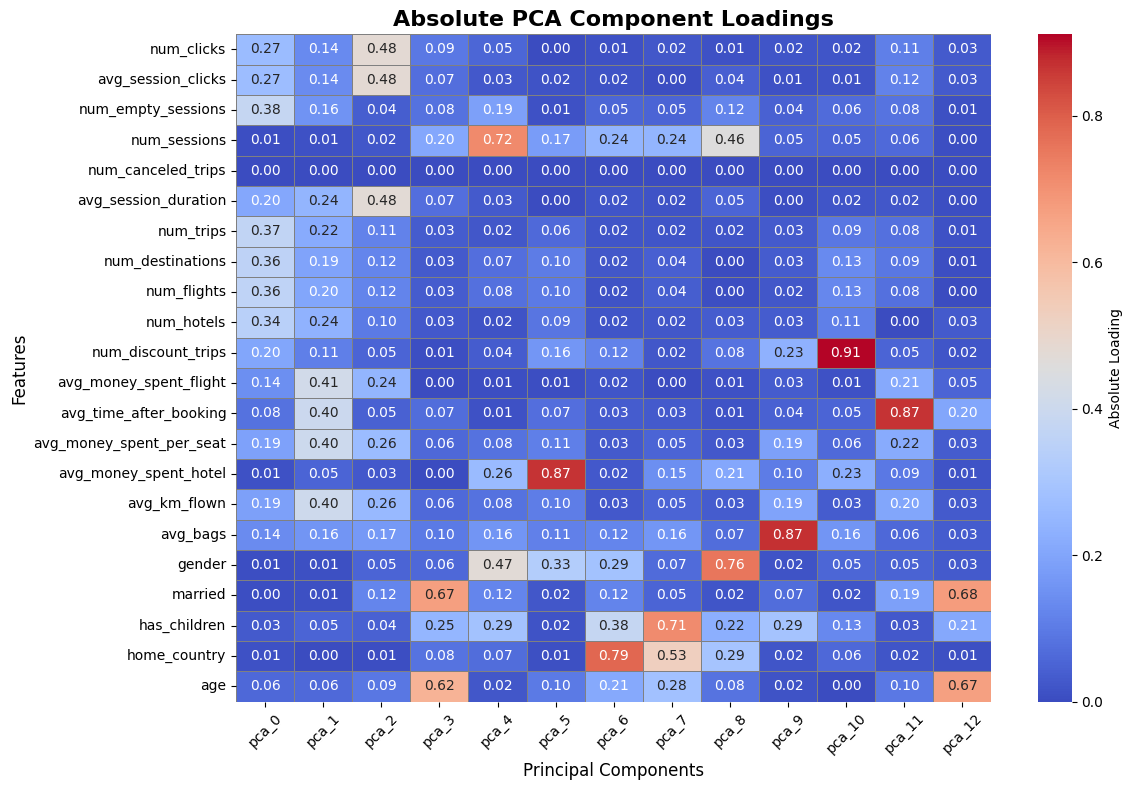

In [26]:
heatmap_fig = plot_pca_component_heatmap(
    component_matrix=component_matrix,
    title="Absolute PCA Component Loadings",
    save_path="outputs/pca_component_heatmap.png"
)
plt.show()

# 📊 PCA Loadings Interpretation

**Die PCA-Analyse zeigt, dass das Klickverhalten (num_clicks, avg_session_clicks) und Buchungsaktivität (num_sessions, num_trips) die wichtigsten Treiber für die ersten Hauptkomponenten sind.**  
**Reiseverhaltensmuster wie Geschäftsreisen (business_rate), Gruppenreisen (group_rate) und saisonale Präferenzen bilden separate Dimensionen im Kundensegmentierungsmodell.**  
**Demografische Merkmale (Alter, Familienstand) haben geringere Gewichtung, was darauf hindeutet, dass das tatsächliche Buchungsverhalten stärker segmentiert als demografische Daten.**


In [27]:
df_pca.sample(5)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12
user_id,,,,,,,,,,,,,
619983,3.152402,-0.691641,0.619980,2.972927,-0.166884,-0.365766,-1.198784,-2.037444,-0.182144,-0.185545,-0.044288,-0.062538,-1.537122
481292,-1.836328,-0.735798,-0.858881,-1.445927,0.290243,-0.408628,0.331926,-0.259239,-0.687543,0.905819,0.131969,-0.072407,0.112827
559266,2.955325,-0.419196,0.449102,-0.307570,0.337913,-0.413842,-0.348478,-1.088348,-0.401570,-0.105320,-0.184731,-0.038721,-0.989699
518127,-1.848079,-2.028777,-0.135288,-1.329560,0.313481,-0.030179,0.291987,-0.460564,-0.461002,-0.396023,0.969544,0.239110,-0.070503
510379,3.401851,-0.613386,1.009455,-1.826382,0.245251,0.132658,0.347825,-0.303124,-0.557607,-0.220664,1.115017,0.107956,0.718860


In [28]:
save_path = os.path.join(pca_data_path, "user_pca.csv")
df_pca.to_csv(save_path, index=True)